In [20]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os
from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

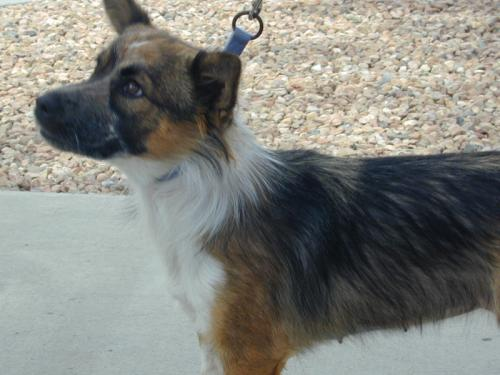

In [21]:
with Image.open("CATS_DOGS\\CATS_DOGS\\train\\DOG\\3.jpg") as im:
    display(im)

In [22]:
path="../CATS_DOGS/CATS_DOGS/"
# Loading all the images paths for the training
img_names=[]
for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)    

In [23]:
len(img_names)

24994

In [24]:
# Checking the size of the images and verfying whether they are corrupted or not
img_sizes=[]
rejected=[]
for item in img_names:
    try :
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
len(img_sizes), len(rejected)   

(24994, 0)

In [25]:
IMAGE_SIZE=[224,224]

In [26]:
# Load the VGG19 model without the top layer which are fully connected
vgg=VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3],
)

In [27]:
# Don't train existing weights as we are using pre-trained weights
for layer in vgg.layers:
  layer.trainable = False

In [28]:
# Flatten layer to convert the 3D feature maps from the VGG19 model to 1D feature vectors
x = Flatten()(vgg.output)
#Dense layer with 2 neurons for 2 classes i.e for classification
prediction = Dense(2, activation='softmax')(x)
#new model with the VGG19 model and the dense layer
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [29]:

# Trainable images are sent through the train_datagen and test_datagen
#The images are randmly rotated between the 0 and 40 degrees
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,#shifts horzontally the images by 20 %
    height_shift_range=0.2,# shifts vertically the images by 20 %
    shear_range=0.2,#applys shear transformation by 20 degrees
    zoom_range=0.2,# zooms the image upto 20%
    horizontal_flip=True,
    fill_mode='nearest',#filling the pixels after the transformation
    )

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [30]:
train_set = train_datagen.flow_from_directory("../TASK3/CATS_DOGS/CATS_DOGS/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18743 images belonging to 2 classes.


In [31]:
test_set = test_datagen.flow_from_directory("../CATS_DOGS/CATS_DOGS/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6251 images belonging to 2 classes.


In [32]:
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size,
    epochs=2)

Epoch 1/2
585/585 ━━━━━━━━━━━━━━━━━━━━ 3354s 6s/step - accuracy: 0.9321 - loss: 1.2862 - val_accuracy: 0.9429 - val_loss: 2.0226
Epoch 2/2
585/585 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9375 - loss: 1.0350 - val_accuracy: 1.0000 - val_loss: 1.0546e-16


In [33]:
loss, accuracy = model.evaluate(test_set)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

196/196 ━━━━━━━━━━━━━━━━━━━━ 850s 4s/step - accuracy: 0.9450 - loss: 2.1290
Validation Loss: 1.9972187280654907
Validation Accuracy: 0.9446488618850708


In [34]:
model.save('DOG_CAT_Cllassifier.h5')
print("model")

model
